# Auto-Encoder

In [1]:
from __future__ import division, print_function, absolute_import

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('/tmp/data/', one_hot=True)

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [4]:
# parameters
learning_rate = 0.01
n_steps = 30000
batch_size = 256
display_step = 1000
samples_to_show = 10

# network parameters
n_hidden_1 = 256
n_hidden_2 = 128
n_input = 784

# tf graph input
X = tf.placeholder(tf.float32, [None, n_input])

weights = {
    'encoder_h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'encoder_h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'decoder_h1': tf.Variable(tf.random_normal([n_hidden_2, n_hidden_1])),
    'decoder_h2': tf.Variable(tf.random_normal([n_hidden_1, n_input]))
}

biases = {
    'encoder_b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'encoder_b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'decoder_b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'decoder_b2': tf.Variable(tf.random_normal([n_input]))
}

In [11]:
def encoder(X):
    layer1 = tf.nn.sigmoid(
        tf.nn.xw_plus_b(X, weights['encoder_h1'], biases['encoder_b1'])
    )
    layer2 = tf.nn.sigmoid(
        tf.nn.xw_plus_b(layer1, weights['encoder_h2'], biases['encoder_b2'])
    )
    return layer2

def decoder(X):
    layer1 = tf.nn.sigmoid(
        tf.nn.xw_plus_b(X, weights['decoder_h1'], biases['decoder_b1'])
    )
    layer2 = tf.nn.sigmoid(
        tf.nn.xw_plus_b(layer1, weights['decoder_h2'], biases['decoder_b2'])
    )
    return layer2

In [14]:
# construct model
encoder_op = encoder(X)
decoder_op = decoder(encoder_op)

y_true = X
y_pred = decoder_op
loss = tf.reduce_mean(tf.pow(y_true - y_pred, 2))

train = tf.train.RMSPropOptimizer(learning_rate).minimize(loss)

init = tf.global_variables_initializer()

In [15]:
sess = tf.Session()
sess.run(init)

# train
for i in range(1, n_steps+1):
    batch_X, batch_y = mnist.train.next_batch(batch_size)
    
    sess.run(train, feed_dict={X: batch_X})
    
    if i % display_step == 0 or i == 1:
        print('step: %i \t loss: %f' % (i, sess.run(loss, feed_dict={X: batch_X})))

step: 1 	 loss: 0.447468
step: 1000 	 loss: 0.150797
step: 2000 	 loss: 0.128547
step: 3000 	 loss: 0.118040
step: 4000 	 loss: 0.106634
step: 5000 	 loss: 0.097240
step: 6000 	 loss: 0.090099
step: 7000 	 loss: 0.088353
step: 8000 	 loss: 0.087737
step: 9000 	 loss: 0.083386
step: 10000 	 loss: 0.086050
step: 11000 	 loss: 0.082529
step: 12000 	 loss: 0.080506
step: 13000 	 loss: 0.080803
step: 14000 	 loss: 0.078624
step: 15000 	 loss: 0.076705
step: 16000 	 loss: 0.074901
step: 17000 	 loss: 0.075527
step: 18000 	 loss: 0.072966
step: 19000 	 loss: 0.071030
step: 20000 	 loss: 0.068914
step: 21000 	 loss: 0.069763
step: 22000 	 loss: 0.070047
step: 23000 	 loss: 0.067967
step: 24000 	 loss: 0.069055
step: 25000 	 loss: 0.068185
step: 26000 	 loss: 0.066321
step: 27000 	 loss: 0.063541
step: 28000 	 loss: 0.063629
step: 29000 	 loss: 0.063790
step: 30000 	 loss: 0.061868


Original Images


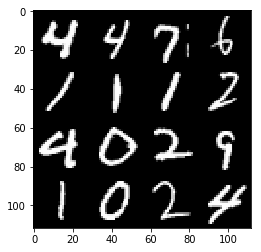

Reconstructed Images


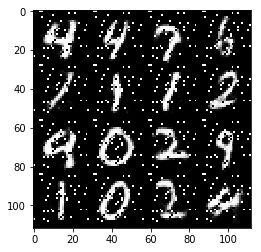

In [21]:
# Testing
# Encode and decode images from test set and visualize their reconstruction.
n = 4
canvas_orig = np.empty((28 * n, 28 * n))
canvas_recon = np.empty((28 * n, 28 * n))
for i in range(n):
    # MNIST test set
    batch_x, _ = mnist.test.next_batch(n)
    # Encode and decode the digit image
    res = sess.run(y_pred, feed_dict={X: batch_x})
    
    for j in range(n):
        canvas_orig[i * 28:(i + 1) * 28, j * 28:(j + 1) * 28] = batch_x[j].reshape([28, 28])
        canvas_recon[i * 28:(i + 1) * 28, j * 28:(j + 1) * 28] = res[j].reshape([28, 28])

print("Original Images")     
plt.figure(figsize=(n, n))
plt.imshow(canvas_orig, origin="upper", cmap="gray")
plt.show()

print("Reconstructed Images")
plt.figure(figsize=(n, n))
plt.imshow(canvas_recon, origin="upper", cmap="gray")
plt.show()